In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Steps por época
STEPS_PER_EPOCH_S1 = 1945
STEPS_PER_EPOCH_S2 = 2754

## Carga datos

In [3]:
f1_s1_file = 'wandb_f1_score_stage1.csv'
f1_s2_file = 'wandb_f1_score_stage2.csv'
loss_s1_file = 'wandb_train_loss_stage1.csv'
loss_s2_file = 'wandb_train_loss_stage2.csv'

df_f1_s1 = pd.read_csv(f1_s1_file)
df_f1_s2 = pd.read_csv(f1_s2_file)
df_loss_s1 = pd.read_csv(loss_s1_file)
df_loss_s2 = pd.read_csv(loss_s2_file)

### Limpieza f1 score

In [4]:
# STAGE 1 (F1)
df_f1_s1_clean = df_f1_s1.rename(columns={"stage1 - f1_score": "f1_score"})[['Step', 'f1_score']]
df_f1_s1_clean['phase'] = 'Stage 1'
df_f1_s1_clean['epoch'] = df_f1_s1_clean['Step'] / STEPS_PER_EPOCH_S1

# STAGE 2 (F1)
df_f1_s2_clean = df_f1_s2.rename(columns={"stage2 - f1_score": "f1_score"})[['Step', 'f1_score']]
df_f1_s2_clean['phase'] = 'Stage 2 (con HNP)'
df_f1_s2_clean['epoch'] = df_f1_s2_clean['Step'] / STEPS_PER_EPOCH_S2

In [5]:
last_epoch_s1_f1 = df_f1_s1_clean['epoch'].max()
print(f"Última época (F1) de Stage 1: {last_epoch_s1_f1:.2f}")
df_f1_s2_clean['epoch'] = df_f1_s2_clean['epoch'] + last_epoch_s1_f1
df_f1_full = pd.concat([df_f1_s1_clean, df_f1_s2_clean]).reset_index(drop=True)

Última época (F1) de Stage 1: 100.00


### Limpieza Train Loss

In [6]:
df_loss_s1_clean = df_loss_s1.rename(columns={"stage1 - train_loss": "train_loss"})[['Step', 'train_loss']]
df_loss_s1_clean['phase'] = 'Stage 1'
df_loss_s1_clean['epoch'] = df_loss_s1_clean['Step'] / STEPS_PER_EPOCH_S1

df_loss_s2_clean = df_loss_s2.rename(columns={"stage2 - train_loss": "train_loss"})[['Step', 'train_loss']]
df_loss_s2_clean['phase'] = 'Stage 2 (con HNP)'
df_loss_s2_clean['epoch'] = df_loss_s2_clean['Step'] / STEPS_PER_EPOCH_S2

In [7]:
last_epoch_s1_loss = df_loss_s1_clean['epoch'].max()
print(f"Última época (Loss) de Stage 1: {last_epoch_s1_loss:.2f}")

df_loss_s2_clean['epoch'] = df_loss_s2_clean['epoch'] + last_epoch_s1_loss

df_loss_full = pd.concat([df_loss_s1_clean, df_loss_s2_clean]).reset_index(drop=True)

Última época (Loss) de Stage 1: 100.00


In [8]:
df_f1_full.tail()

,Step,f1_score,phase,epoch
106,82657,0.826603,Stage 2 (con HNP),130.013435
107,96433,0.840077,Stage 2 (con HNP),135.015614
108,110209,0.826376,Stage 2 (con HNP),140.017792
109,123985,0.845290,Stage 2 (con HNP),145.019971
110,137761,0.830243,Stage 2 (con HNP),150.022150


In [9]:
df_loss_full.tail()

,Step,train_loss,phase,epoch
145,126739,0.360351,Stage 2 (con HNP),146.018943
146,129494,0.359031,Stage 2 (con HNP),147.019306
147,132249,0.357070,Stage 2 (con HNP),148.019669
148,135004,0.359180,Stage 2 (con HNP),149.020032
149,137759,0.356673,Stage 2 (con HNP),150.020395


## Gráficas

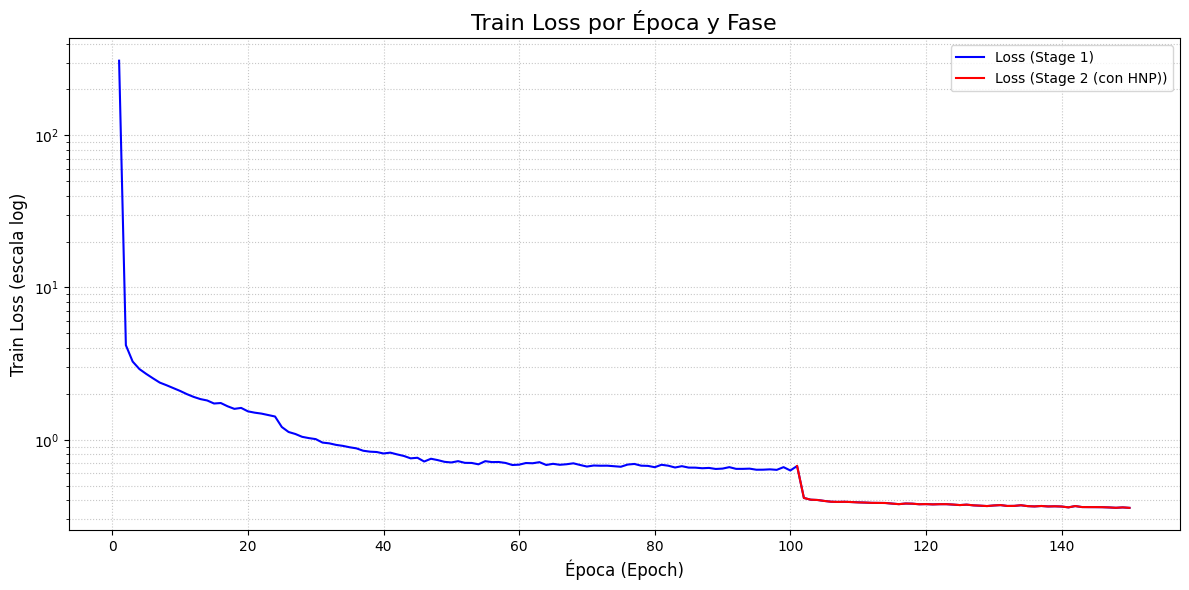

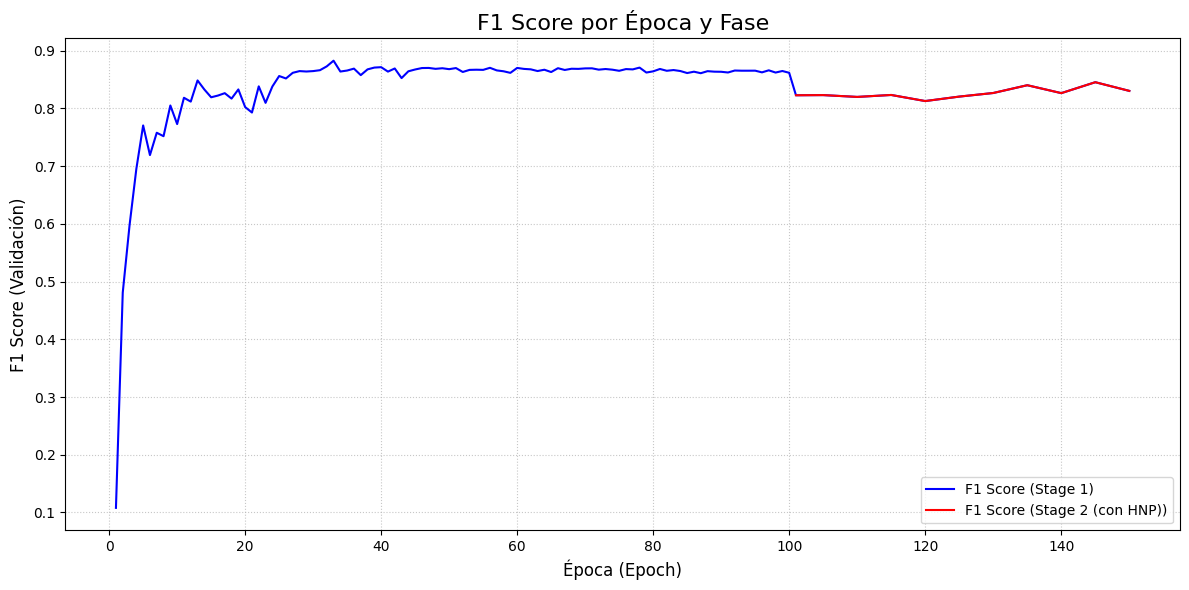

In [10]:
# Preparar datos
phase1 = "Stage 1"
phase2 = "Stage 2 (con HNP)"
color1 = 'blue' 
color2 = 'red'   

df_loss_sorted = df_loss_full.sort_values(by='epoch')
df_f1_sorted = df_f1_full.sort_values(by='epoch')

loss_s2 = df_loss_sorted[df_loss_sorted['phase'] == phase2]
f1_s2 = df_f1_sorted[df_f1_sorted['phase'] == phase2]

# GRÁFICA 1: Train Loss (con escala logarítmica)
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_loss_sorted['epoch'], df_loss_sorted['train_loss'], 
         color=color1, 
         linestyle='-', 
         label=f'Loss ({phase1})')

ax1.plot(loss_s2['epoch'], loss_s2['train_loss'], 
         color=color2, 
         linestyle='-', 
         label=f'Loss ({phase2})')

ax1.set_yscale('log')  # Escala logarítmica
ax1.set_xlabel('Época (Epoch)', fontsize=12)
ax1.set_ylabel('Train Loss (escala log)', fontsize=12)
ax1.set_title('Train Loss por Época y Fase', fontsize=16)
ax1.legend(loc='best')
ax1.grid(True, linestyle=':', alpha=0.7, which='both')  # Grid para ambas escalas

fig1.tight_layout()
plt.show()

# GRÁFICA 2: F1 Score
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.plot(df_f1_sorted['epoch'], df_f1_sorted['f1_score'], 
         color=color1, 
         label=f'F1 Score ({phase1})')

ax2.plot(f1_s2['epoch'], f1_s2['f1_score'], 
         color=color2, 
         label=f'F1 Score ({phase2})')

ax2.set_xlabel('Época (Epoch)', fontsize=12)
ax2.set_ylabel('F1 Score (Validación)', fontsize=12)
ax2.set_title('F1 Score por Época y Fase', fontsize=16)
ax2.legend(loc='best')
ax2.grid(True, linestyle=':', alpha=0.7)

fig2.tight_layout()
plt.show()


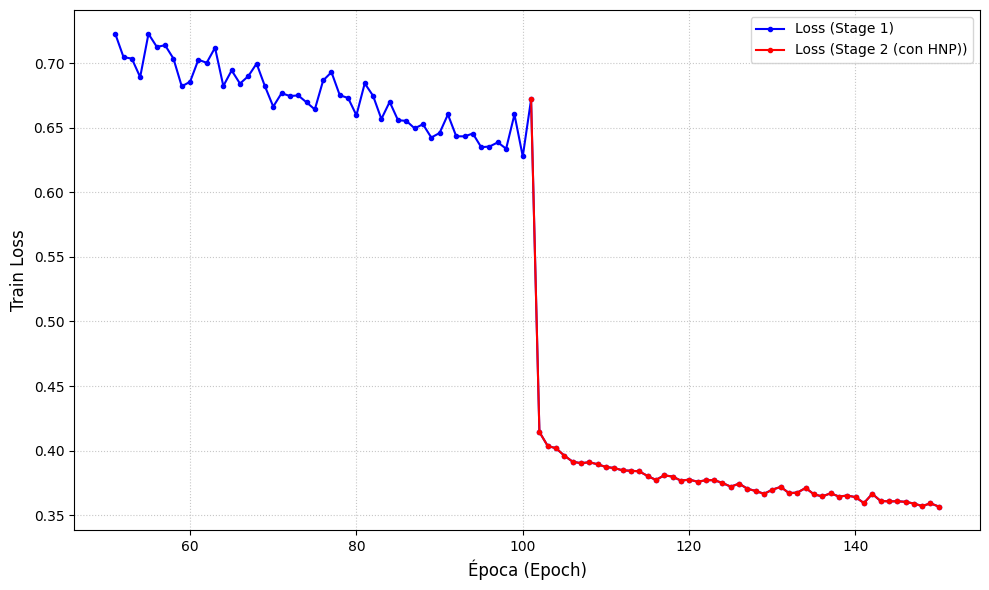

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))

phase1 = "Stage 1"
phase2 = "Stage 2 (con HNP)"
color1 = 'blue' 
color2 = 'red'   


df_loss_epoca_50_plus = df_loss_full[df_loss_full['epoch'] >= 50].sort_values(by='epoch')


loss_s2_epoca_50_plus = df_loss_epoca_50_plus[df_loss_epoca_50_plus['phase'] == phase2]

ax1.plot(df_loss_epoca_50_plus['epoch'], df_loss_epoca_50_plus['train_loss'], 
         color=color1, 
         linestyle='-', 
         marker='.',
         label=f'Loss ({phase1})')

ax1.plot(loss_s2_epoca_50_plus['epoch'], loss_s2_epoca_50_plus['train_loss'], 
         color=color2, 
         linestyle='-', 
         marker='.',
         label=f'Loss ({phase2})')

ax1.set_xlabel('Época (Epoch)', fontsize=12)
ax1.set_ylabel('Train Loss', fontsize=12)
ax1.legend(loc='best')
ax1.grid(True, linestyle=':', alpha=0.7)

fig.tight_layout()
plt.show()